# The MNIST dataset training using the Convolutional Neural Networks

In this module, we will

1. implement a CNN architecture 
2. explore if the accuracy is increased in comparison to using only dense layers

In [1]:
# imports 
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


## Exploring the Dataset

In this module, we are using the famous MINST digit dataset; however, the keras datasets library contains other [datasets](https://keras.io/api/datasets/) as well. You are advised to explore them and learn using them.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

**Let's explore the dataset**

In [3]:
num_x_train = x_train.shape[0]
x_train_dim = x_train.shape[1:]

num_x_test = x_test.shape[0]
x_test_dim = x_train.shape[1:]

print('There are {} train images of size : {}.\n'.format(num_x_train, x_train_dim))
print('There are {} test images of size : {}.\n'.format(num_x_test, x_test_dim))

There are 60000 train images of size : (28, 28).

There are 10000 test images of size : (28, 28).



**Let's view some of the images**

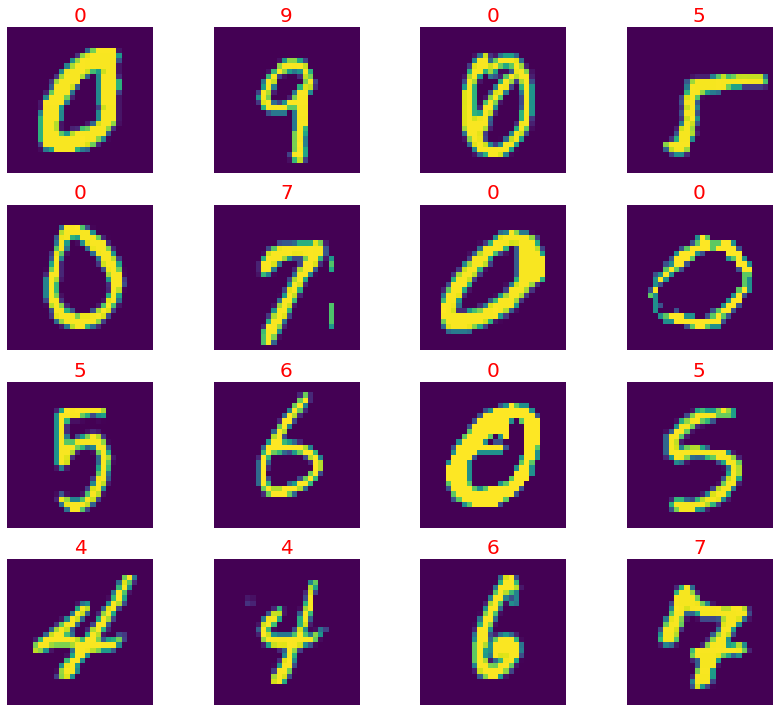

In [4]:
import matplotlib.pyplot as plt

np.random.seed(1)
indices = np.random.randint(0, 60000, size = 16)
plt.figure(figsize = (12, 10))
for i, index in enumerate(indices):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[index,:])
  plt.title(y_train[index], fontsize= 20, color= "red")
  plt.axis('off')
  
plt.tight_layout()

***
The `Conv2D` layer accepts inputs with atleast three dimensions; whereas, our images are 2D, that is, each image is of $28\times28$ size. So, first we will add another dimension (channels dimension) to our dataset.
***

In [5]:
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]

# Normalizing the data
x_train, x_test = x_train/255.0, x_test/255.0

## Build a Sequential Model

In [6]:
model = Sequential(name = 'CNN-Model')

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', 
                 input_shape = (28, 28, 1), data_format = 'channels_last', activation=tf.nn.relu))
model.add(Flatten())
model.add(Dense(units = 32, activation=tf.nn.relu, name = 'Layer-2'))
model.add(Dense(units = 10, activation = tf.nn.softmax, name = 'Output-Layer'))
print(model.summary())

Model: "CNN-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
Layer-2 (Dense)              (None, 32)                401440    
_________________________________________________________________
Output-Layer (Dense)         (None, 10)                330       
Total params: 401,930
Trainable params: 401,930
Non-trainable params: 0
_________________________________________________________________
None


In addition to seeing the summary, we can also view the architecture.


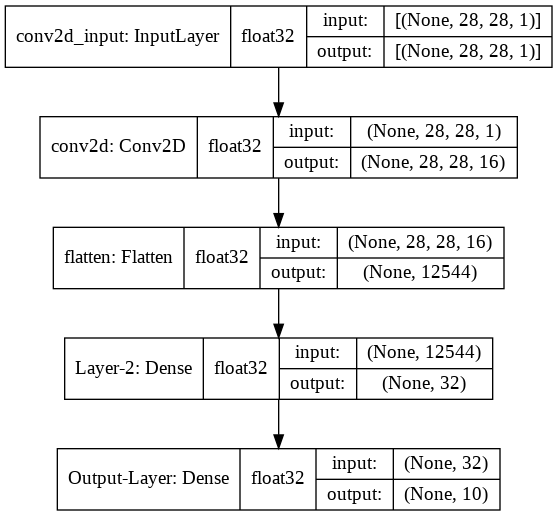

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_dtype=True, 
           show_layer_names = True)

**Compiling the Model:**

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

**Training the Model:**

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1976 - accuracy: 0.9405 - val_loss: 0.0817 - val_accuracy: 0.9743
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0687 - accuracy: 0.9788 - val_loss: 0.0663 - val_accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.0629 - val_accuracy: 0.9802
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.0652 - val_accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0233 - accuracy: 0.9931 - val_loss: 0.0599 - val_accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0670 - val_accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0758 -

**Plotting the Loss and Accuracy**

In [10]:
import pandas as pd

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.197613,0.940517,0.081688,0.9743
1,0.068744,0.978800,0.066348,0.9793
2,0.046099,0.985517,0.062871,0.9802
3,0.032463,0.990233,0.065166,0.9796
4,0.023299,0.993117,0.059881,0.9822


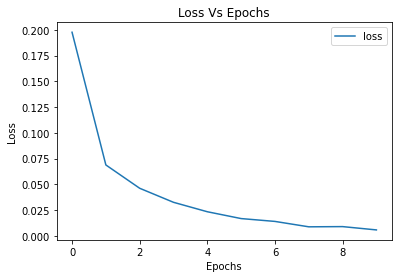

In [11]:
loss_plot = df.plot(y = 'loss', title = 'Loss Vs Epochs', legend = True)
loss_plot.set(xlabel = "Epochs", ylabel = "Loss");

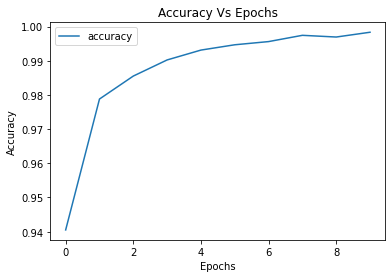

In [12]:
accuracy_plot = df.plot(y = 'accuracy', title = 'Accuracy Vs Epochs', legend = True)
accuracy_plot.set(xlabel = "Epochs", ylabel = "Accuracy");

***
### Prediction

Let's predict a few randomly selected images from the test dataset.

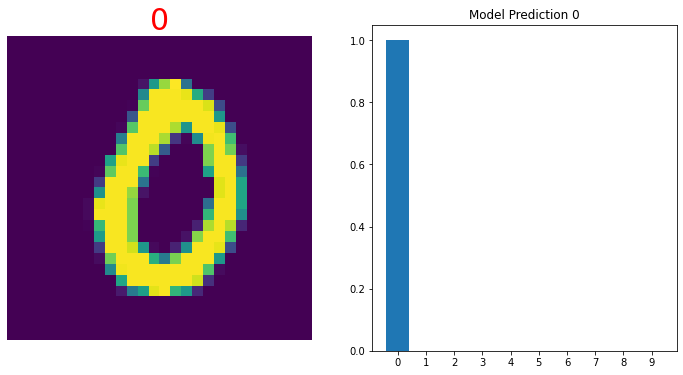

In [20]:
random_index = np.random.choice(x_test.shape[0])
image = x_test[random_index,...].squeeze()
label = y_test[random_index]

predictions = model.predict(image[np.newaxis, :,:,np.newaxis])

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title(label, fontsize = 30, color = 'red')
axes[1].bar(np.arange(predictions.shape[1]),predictions.squeeze())
axes[1].set_xticks(np.arange(predictions.shape[1]))
axes[1].set_title('Model Prediction {}'.format(np.argmax(predictions), color = 'red', fontsize = 30))
plt.show()